In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from geopy.geocoders import Nominatim
import folium

In [2]:
df = pd.read_csv("2021_coordinates_clean.csv")
df

,Unnamed: 0,accident_id,accident_serial_no,accident_date,longitude,latitude,minor,major,moderate,death,materials,humans,collision,runover,rollover
0,0,2331821,A1169844,2021-01-30 10:30:00,35.475319,30.315749,0,0,0,0,1,0,1,0,0.0
1,1,2338617,A1174103,2021-01-03 18:35:00,35.467591,30.314795,0,0,0,0,1,0,1,0,0.0
2,2,2339228,A1174777,2021-01-05 09:13:00,35.475517,30.316584,0,0,0,0,1,0,1,0,0.0
3,3,2339465,A1175045,2021-01-05 17:14:00,35.588864,30.810246,0,0,0,0,1,0,1,0,0.0
4,4,2344371,A1177277,2021-01-10 14:36:00,35.468444,30.202686,1,0,1,0,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,2545923,A1374393,2021-12-28 12:06:00,35.630697,30.739497,1,0,3,0,0,1,1,0,0.0
256,256,2545944,A1374416,2021-12-28 12:45:00,35.631198,30.654500,0,0,1,0,0,1,0,1,0.0
257,257,2546000,A1374478,2021-12-28 14:16:00,35.472048,30.317146,0,0,0,0,1,0,1,0,0.0
258,258,2546403,A1374945,2021-12-29 10:56:00,35.629000,30.734301,0,0,0,0,1,0,1,0,0.0


In [3]:
data = df.iloc[:, 4:6]
data.head()

,longitude,latitude
0,35.475319,30.315749
1,35.467591,30.314795
2,35.475517,30.316584
3,35.588864,30.810246
4,35.468444,30.202686


In [4]:
num_labels = 15

In [5]:

K = range(2, num_labels)
silh_scores = []

for k in K:
    km = KMeans(n_clusters = k)
    km.fit(data)
    scores = silhouette_score(data, km.labels_)
    silh_scores.append(scores
                      )

C:\Users\Sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

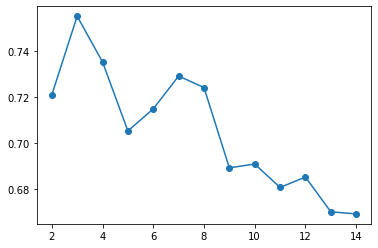

In [6]:
plt.plot(K, silh_scores, marker = 'o')
plt.show()

we get true_K = 3

In [7]:
true_k = 3
km = KMeans(n_clusters = true_k)
km.fit(data)
labels = km.labels_

C:\Users\Sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [8]:
df['KMeans_labels'] = labels

In [9]:
df

,Unnamed: 0,accident_id,accident_serial_no,accident_date,longitude,latitude,minor,major,moderate,death,materials,humans,collision,runover,rollover,KMeans_labels
0,0,2331821,A1169844,2021-01-30 10:30:00,35.475319,30.315749,0,0,0,0,1,0,1,0,0.0,0
1,1,2338617,A1174103,2021-01-03 18:35:00,35.467591,30.314795,0,0,0,0,1,0,1,0,0.0,0
2,2,2339228,A1174777,2021-01-05 09:13:00,35.475517,30.316584,0,0,0,0,1,0,1,0,0.0,0
3,3,2339465,A1175045,2021-01-05 17:14:00,35.588864,30.810246,0,0,0,0,1,0,1,0,0.0,1
4,4,2344371,A1177277,2021-01-10 14:36:00,35.468444,30.202686,1,0,1,0,0,1,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,2545923,A1374393,2021-12-28 12:06:00,35.630697,30.739497,1,0,3,0,0,1,1,0,0.0,1
256,256,2545944,A1374416,2021-12-28 12:45:00,35.631198,30.654500,0,0,1,0,0,1,0,1,0.0,1
257,257,2546000,A1374478,2021-12-28 14:16:00,35.472048,30.317146,0,0,0,0,1,0,1,0,0.0,0
258,258,2546403,A1374945,2021-12-29 10:56:00,35.629000,30.734301,0,0,0,0,1,0,1,0,0.0,1


In [10]:
df['KMeans_labels'].value_counts()

1    109
0    108
2     43
Name: KMeans_labels, dtype: int64

In [20]:
centroids = km.cluster_centers_
centroids

array([[35.47725152, 30.29421817],
       [35.61576601, 30.7384021 ],
       [35.54489518, 30.51014948]])

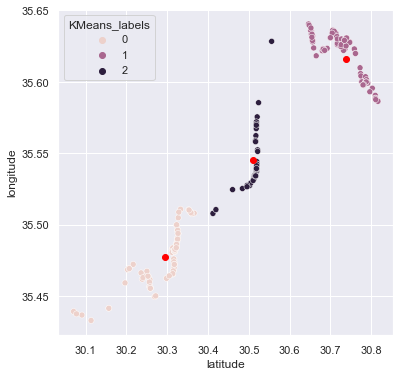

In [25]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, hue = 'KMeans_labels')
plt.scatter(centroids[:, 1], centroids[:, 0], marker = "o", color = 'red')
plt.show()

In [ ]:
#df.to_excel('co-ordinates_cluster.xlsx', index = False)